<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) Project 4 is all about exploring this data and modeling interesting relationships with regression.

Project 4 is also much more open-ended than the previous projects. You are more responsible for finding things about the data that interest you, coming up with your own hypothesis about it, and reporting on the analysis you carry out. That being said, there are still specific requirements and restrictions on the type of models you will be constructing.

---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

**There is a lot of different data. You are _NOT_ expected to explore all of it or include all of it in analyses.** The point of the project is to focus on aspects of San Francisco that are particularly interesting to you from a modeling point of view. 

**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Choose a dataset or datasets of interest to you and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm

In [205]:
sfdf2 = pd.read_csv('/Users/caitlinmowdy/Desktop/DSI-SF-2-caitlinmowdy/datasets/san_francisco/san_francisco/fire_data/fire_incidents.csv')

In [206]:
#I chose to use the fire incidents data because it had a lot of numerical data 
sfdf2.head(3)

,Incident Number,Exposure Number,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,Zipcode,...,Detector Effectiveness,Detector Failure Reason,Automatic Extinguishing System Present,Automatic Extinguishing Sytem Type,Automatic Extinguishing Sytem Perfomance,Automatic Extinguishing Sytem Failure Reason,Number of Sprinkler Heads Operating,Supervisor District,Neighborhood District,Location
0,9030109,0,310 Colon Av.,04/12/2009,91020273,04/12/2009 06:09:13 PM,04/12/2009 06:13:45 PM,04/12/2009 07:23:13 PM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13067402,0,20 Lansdale Av,07/18/2013,131990117,07/18/2013 10:32:03 AM,07/18/2013 10:37:15 AM,07/18/2013 10:39:55 AM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12044490,0,7th St. / Folsom St.,05/13/2012,121340051,05/13/2012 03:55:37 AM,05/13/2012 04:01:57 AM,05/13/2012 04:05:44 AM,SF,94103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,South of Market,"(37.7767460000297, -122.407844)"


In [207]:
sfdf2.info()
sfdf2.isnull().sum().T
sfdf2.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406736 entries, 0 to 406735
Data columns (total 63 columns):
Incident Number                                 406736 non-null int64
Exposure Number                                 406736 non-null int64
Address                                         406633 non-null object
Incident Date                                   406736 non-null object
Call Number                                     406736 non-null int64
Alarm DtTm                                      406736 non-null object
Arrival DtTm                                    406718 non-null object
Close DtTm                                      406736 non-null object
City                                            405509 non-null object
Zipcode                                         334349 non-null float64
Battalion                                       406736 non-null object
Station Area                                    406207 non-null object
Box                                    

Index([u'Incident Number', u'Exposure Number', u'Address', u'Incident Date',
       u'Call Number', u'Alarm DtTm', u'Arrival DtTm', u'Close DtTm', u'City',
       u'Zipcode', u'Battalion', u'Station Area', u'Box', u'Suppression Units',
       u'Suppression Personnel', u'EMS Units', u'EMS Personnel',
       u'Other Units', u'Other Personnel', u'First Unit On Scene',
       u'Estimated Property Loss', u'Estimated Contents Loss',
       u'Fire Fatalities', u'Fire Injuries', u'Civilian Fatalities',
       u'Civilian Injuries', u'Number of Alarms', u'Primary Situation',
       u'Mutual Aid', u'Action Taken Primary', u'Action Taken Secondary',
       u'Action Taken Other', u'Detector Alerted Occupants', u'Property Use',
       u'Area of Fire Origin', u'Ignition Cause', u'Ignition Factor Primary',
       u'Ignition Factor Secondary', u'Heat Source', u'Item First Ignited',
       u'Human Factors Associated with Ignition', u'Structure Type',
       u'Structure Status', u'Floor of Fire Origin', 

In [283]:
# There are a lot nulls in this data. Too many to drop or it would drop everything. 
# I'm going to make a subset dataframe that is full of numerical data columns that don't have too many nulls

sfdf_fire = sfdf2[['Alarm DtTm', 'Arrival DtTm','Suppression Units',
                      'Suppression Personnel', 'EMS Units', 'EMS Personnel','Other Units', 'Other Personnel',
                      'Fire Fatalities', 'Fire Injuries', 'Civilian Fatalities',
                      'Civilian Injuries']]

In [284]:
sfdf_fire.dropna(inplace = True)


/Users/caitlinmowdy/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
#covert times to datetime
from datetime import datetime 
sfdf_fire['Alarm DtTm'] = pd.to_datetime(sfdf_fire['Alarm DtTm'], )
sfdf_fire['Arrival DtTm'] = pd.to_datetime(sfdf_fire['Arrival DtTm'])

# create a response time column
sfdf_fire['Response Time'] = sfdf_fire['Arrival DtTm']-sfdf_fire['Alarm DtTm']

sfdf_fire.head(2)

In [305]:
from datetime import timedelta
# make a column for the seconds it take to respond
def get_sec(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

sfdf_fire['total_sec'] = sfdf_fire['Response Time'].apply(str).apply(lambda x: x[7:]).apply(get_sec)

/Users/caitlinmowdy/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


ERROR! Session/line number was not unique in database. History logging moved to new session 164


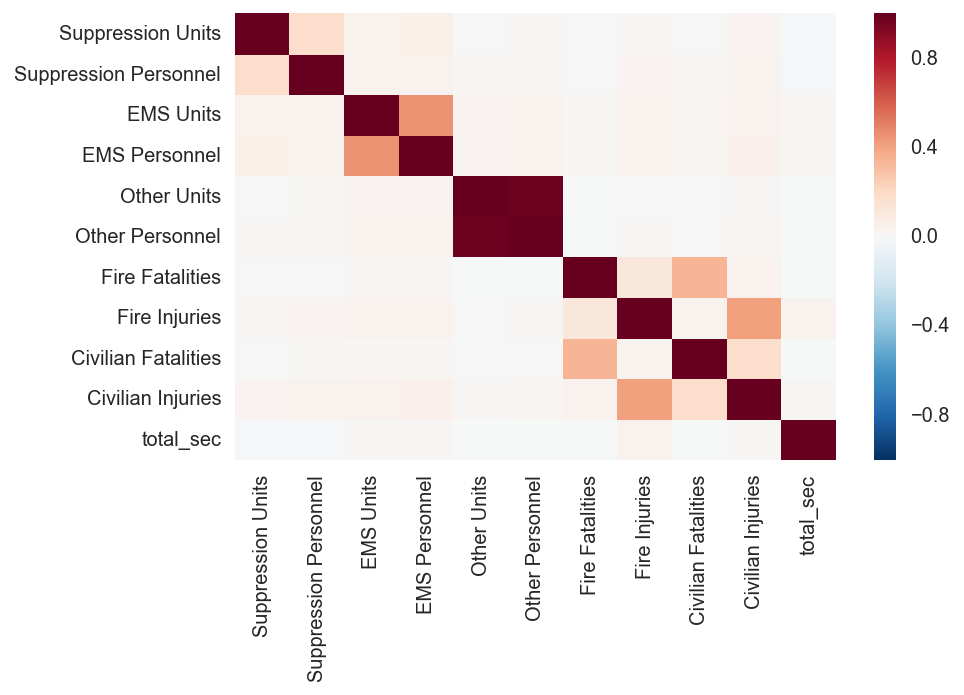

In [316]:
corrl = sfdf_fire.corr()
corrl
sns.heatmap(corrl)


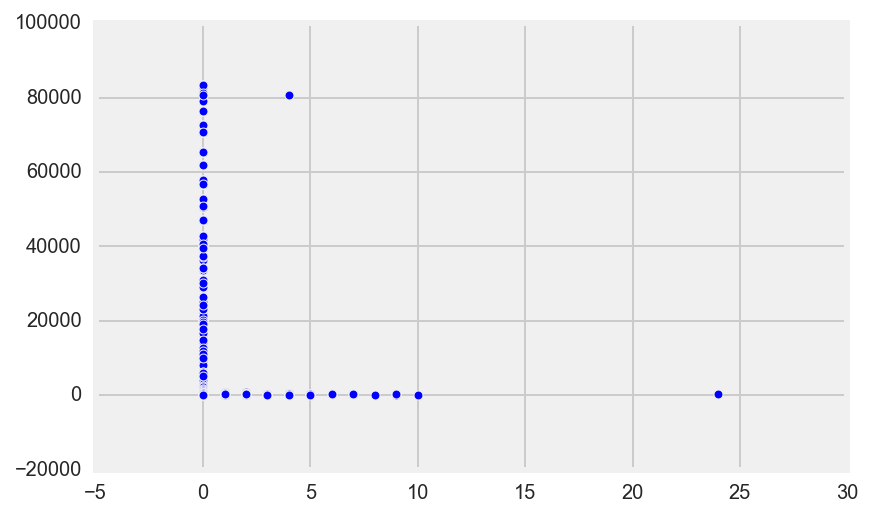

In [341]:
# I am interested in the total seconds response time.

plt.scatter(sfdf_fire['fire_injuries'].values,sfdf_fire['total_sec'].values)
plt.scatter(sfdf_fire['civilian_injuries'].values,sfdf_fire['total_sec'].values)
plt.scatter(sfdf_fire['civilian_fatalities'].values,sfdf_fire['total_sec'].values)
plt.scatter(sfdf_fire['fire_fatalities'].values,sfdf_fire['total_sec'].values)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [324]:
sfdf_fire.head(0)


,Alarm DtTm,Arrival DtTm,Suppression Units,Suppression Personnel,EMS Units,EMS Personnel,Other Units,Other Personnel,Fire Fatalities,Fire Injuries,Civilian Fatalities,Civilian Injuries,Response Time,total_sec


In [328]:
# rename columns
sfdf_fire.columns = ['alarm_time','arival_time','suppression_units','suppression_personnel','ems_units',
                    'ems_personnel','other_unis','other_personnel','fire_fatalities','fire_injuries','civilian_fatalities',
                    'civilian_injuries','response_time','total_sec'] 

In [329]:
#much nicer 
sfdf_fire.head()


,alarm_time,arival_time,suppression_units,suppression_personnel,ems_units,ems_personnel,other_unis,other_personnel,fire_fatalities,fire_injuries,civilian_fatalities,civilian_injuries,response_time,total_sec
0,2009-04-12 18:09:13,2009-04-12 18:13:45,1,5,0,0,0,0,0,0,0,0,00:04:32,272
1,2013-07-18 10:32:03,2013-07-18 10:37:15,3,11,0,0,0,0,0,0,0,0,00:05:12,312
2,2012-05-13 03:55:37,2012-05-13 04:01:57,3,10,0,0,0,0,0,0,0,0,00:06:20,380
3,2013-04-09 16:34:07,2013-04-09 16:39:31,3,10,0,0,0,0,0,0,0,0,00:05:24,324
4,2011-11-01 18:07:45,2011-11-01 18:10:17,2,9,0,0,0,0,0,0,0,0,00:02:32,152


In [171]:
#export file so I don't have to do any of that again!!!!!!!!
#sfdf_fire.to_csv(path_or_buf='~/sfdf_fire.csv')
sfdf_fire = pd.read_csv('~/sfdf_fire.csv')
sfdf_fire['fatalities'] = sfdf_fire['fire_fatalities'] + sfdf_fire['civilian_fatalities']


In [173]:
import patsy
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
# Hypothesis: total second response time is realted to fatalities. I am going to find a model that can
#predict total sec using the fire and civilian fatilities columns

#linear regression
formula = 'fatalities ~ total_sec'
y, X = patsy.dmatrices(formula, data=sfdf_fire, return_type='dataframe')

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33)

lr = LinearRegression()
model= lr.fit(X_train,y_train)
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error

score = model.score(X_test,y_test)
score

1.3874667148527919e-07

In [174]:

mean_squared_error(y_test, predictions)

0.00014900884675851899

In [175]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(model, X, y, cv=5)
print "Cross-validated scores:", scores

Cross-validated scores: [ 0.         0.         0.         0.        -0.0001807]


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine multiple sources of data and evaluate a model with regularized regression

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**

1. Use _NEW_ sources of data for this section. It should not be related to your analysis/hypothesis from section 1.
- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.
- Report on which model is best, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [122]:
sfdf3 = pd.read_csv('/Users/caitlinmowdy/Desktop/DSI-SF-2-caitlinmowdy/datasets/san_francisco/san_francisco/assessor_office/assessor_data_2007_2008.csv')
# now Im looking at one of the assessor files. I chose this one because it had numerical data 

In [123]:
sfdf3.columns.values

array(['PROPLOC', 'RP1NBRCDE', 'RP1PRCLID', 'RP1VOLUME', 'RP1CLACDE',
       'YRBLT', 'BATHS', 'BEDS', 'ROOMS', 'STOREYNO', 'UNITS', 'CHGDATE',
       'ZONE', 'CONSTTYPE', 'DEPTH', 'FRONT', 'SQFT', 'FBA', 'LAREA',
       'LOTCODE', 'REPRISDATE', 'RP1RECDAT1', 'RP1DOCNO1', 'RP1DOCNO2',
       'RP1TRACDE', 'OWNRPRCNT', 'EXEMPTYPE', 'RP1STACDE', 'RP1EXMVL2',
       'RP1EXMVL1', 'ROLLYEAR', 'RECURRSALD', 'RP1FXTVAL', 'RP1IMPVAL',
       'RP1LNDVAL', 'RP1PPTVAL'], dtype=object)

In [124]:
#make a sub with the variable were interested in 
sfdf3_1 = sfdf3[['YRBLT','BATHS','BEDS','ROOMS','STOREYNO','UNITS','DEPTH', 'FRONT', 
                'SQFT', 'FBA', 'LAREA','OWNRPRCNT', 'RP1FXTVAL', 'RP1IMPVAL','RP1LNDVAL', 'RP1PPTVAL']]

In [125]:
sfdf3_1.head(2)

,YRBLT,BATHS,BEDS,ROOMS,STOREYNO,UNITS,DEPTH,FRONT,SQFT,FBA,LAREA,OWNRPRCNT,RP1FXTVAL,RP1IMPVAL,RP1LNDVAL,RP1PPTVAL
0,1900,0,0,0,0,0,0.0,0.0,0,0,27965.0,1.0,0,0,0,0
1,1900,0,0,0,0,0,0.0,0.0,0,0,8359.0,1.0,0,0,0,0


In [126]:
# renname the columns
sfdf3_1.columns = ['yr_blt','baths','beds','rooms','storeis','units','depth','front','sqft','sqft_basement',
                  'sqft_lot','owner_prec','fixt_val','improv_val','land_val',
                   'personal_val']

In [127]:
#make a total values column 
sfdf3_1['value']= sfdf3_1.fixt_val + sfdf3_1.improv_val + sfdf3_1.land_val

/Users/caitlinmowdy/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [128]:
# sfdf3_1.info()
corrl = sfdf3_1[['yr_blt','baths','beds','rooms','storeis','units','depth','front','sqft','sqft_basement',
                  'sqft_lot','owner_prec','value']].corr()

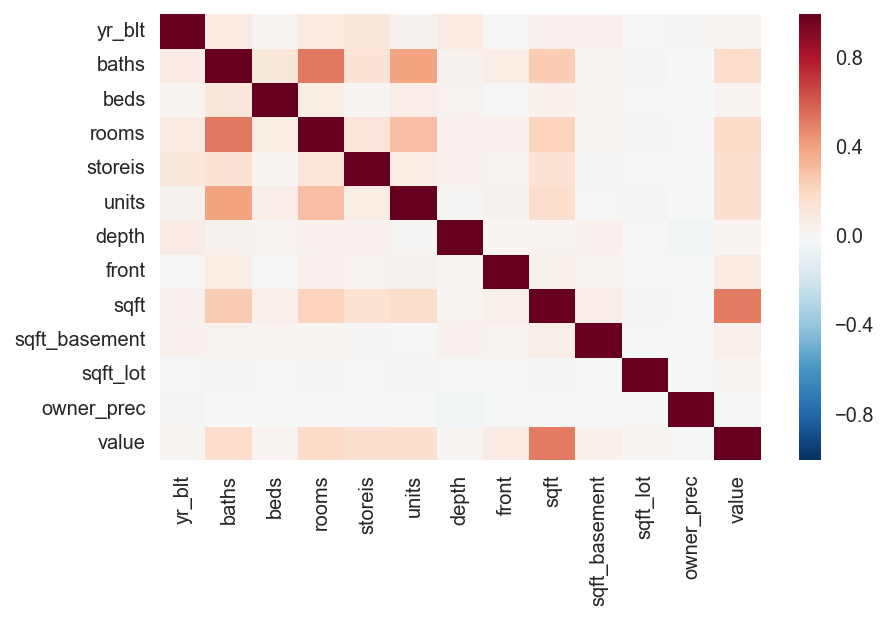

In [129]:
sns.heatmap(corrl)

In [130]:
sfdf3_1.value.max()

868020000

In [131]:
# used  a scatter to find outliers and then remove them 
# plt.scatter(sfdf3_1['sqft'].values,sfdf3_1['value'].values,s=30)
sfdf3_2 = sfdf3_1[sfdf3_1['value'] < 868020000]
sfdf3_2 = sfdf3_2[sfdf3_2['sqft'] < 3000000]

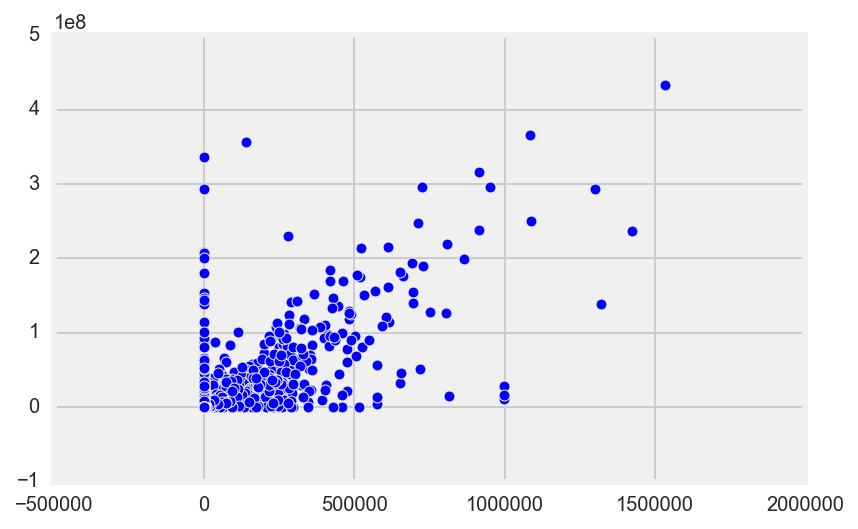

In [132]:
plt.scatter(sfdf3_2['sqft'].values,sfdf3_2['value'].values,s=30)


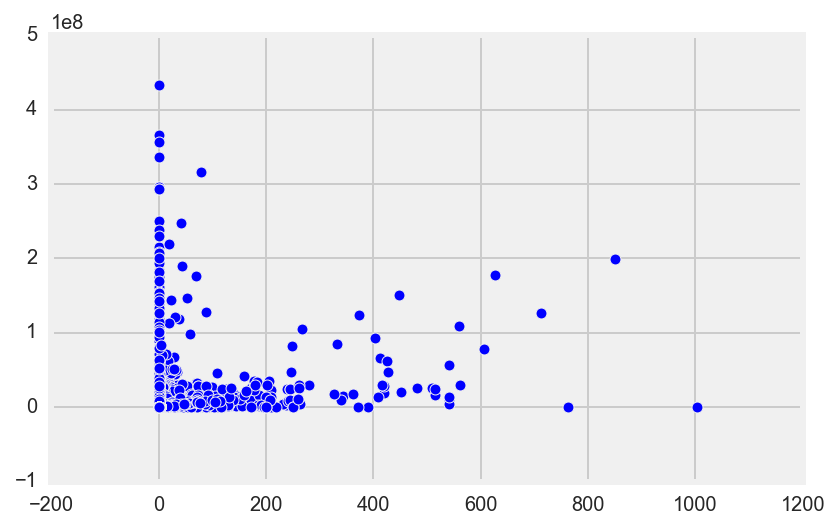

In [133]:
plt.scatter(sfdf3_2['baths'].values,sfdf3_2['value'].values,s=30)

In [134]:
# drop where property value = 0 
sfdf3_3 = sfdf3_2[sfdf3_2['value'] != 0]

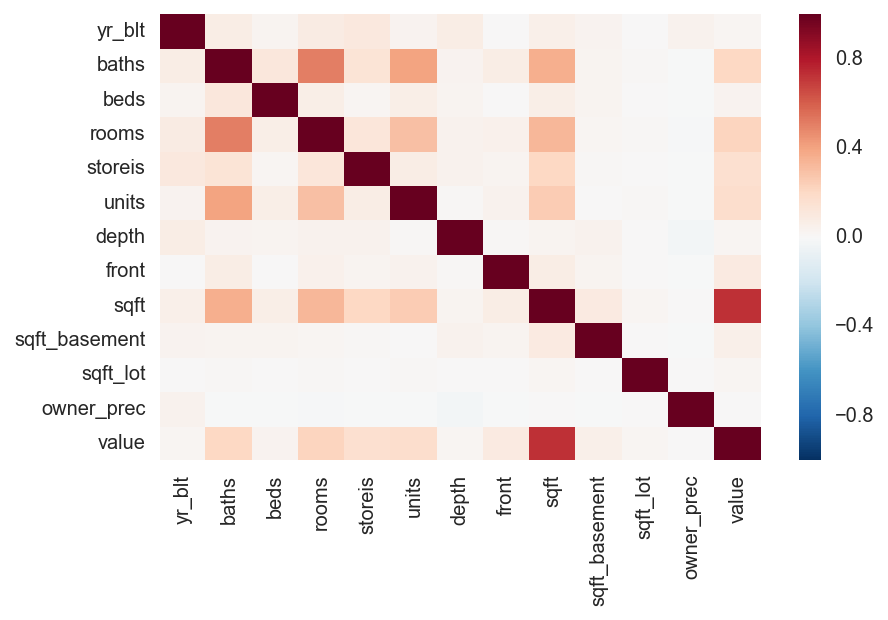

In [135]:
corrl = sfdf3_3[['yr_blt','baths','beds','rooms','storeis','units','depth','front','sqft','sqft_basement',
                  'sqft_lot','owner_prec','value']].corr()
sns.heatmap(corrl)

In [136]:
sfdf3_3.to_csv(path_or_buf='~/sfdf3_3.csv')

In [137]:
allscores = {}

In [138]:
from sklearn.grid_search import GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn import grid_search

In [139]:
import patsy
scaler = StandardScaler()

formula = 'value ~ baths + units + rooms + sqft-1'
y, X = patsy.dmatrices(formula, data=sfdf3_3, return_type='dataframe')
y = np.array(y).ravel()
Xn = scaler.fit_transform(X)


linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, Xn, y, cv=10)

allscores['linear Regression'] = [np.mean(linreg_scores)]
print linreg_scores
print np.mean(linreg_scores)

[ 0.64183046  0.13900326  0.10048294  0.05501218  0.28590284 -0.06517995
  0.44719909 -0.37901494 -0.00899196  0.44267162]
0.165891553835


In [140]:
# ridge
from sklearn.linear_model import RidgeCV
alphas = np.logspace(0,5,20)
ridge_params = {
    'fit_intercept': [True, False], 
    'normalize':[False, True],
    'alpha': alphas
}

ridge = Ridge()
best_ridge = grid_search.GridSearchCV(ridge, ridge_params, cv=5)
r_results = best_ridge.fit(Xn, y)

ridge_scores = cross_val_score(best_ridge, Xn, y, cv=5)

allscores['Ridge'] = [np.mean(ridge_scores)]
print "Ridge best Score: ", r_results.best_score_
print "Ridge Params: ", r_results.best_params_

print 'Ridge score: ', ridge_scores
print 'Ridge mean score: ',np.mean(ridge_scores)

Ridge best Score:  0.383201801162
Ridge Params:  {'normalize': False, 'alpha': 54555.947811685146, 'fit_intercept': True}
Ridge score:  [ 0.4041179   0.14521319  0.4966755   0.36049762  0.41235991]
Ridge mean score:  0.363772823943


In [141]:
#Lasso
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

alphas = np.logspace(0,5,20)
lasso_params = {
    'fit_intercept': [True, False], 
    'normalize':[False, True],
    'alpha': alphas
}

lasso = Lasso()
best_lasso = grid_search.GridSearchCV(lasso, ridge_params, cv=5)
l_results = best_lasso.fit(Xn, y)

lasso_scores = cross_val_score(best_lasso, Xn, y, cv=5)

allscores['Lasso'] = [np.mean(lasso_scores)]
print "Lasso best Score: ", l_results.best_score_
print "Lasso Params: ", l_results.best_params_

print 'Lasso score: ', lasso_scores
print 'Lasso mean score: ',np.mean(lasso_scores)

Lasso best Score:  0.380193952625
Lasso Params:  {'normalize': True, 'alpha': 2636.6508987303582, 'fit_intercept': True}
Lasso score:  [ 0.55678648  0.16769506  0.56279327  0.44885904  0.41589019]
Lasso mean score:  0.430404807607


In [142]:
#elastic
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
alphas = np.logspace(0,5,20)
enet_params = {
    'fit_intercept': [True, False], 
    'normalize':[False, True],
    'alpha': alphas
}

enet = ElasticNet()
best_enet = grid_search.GridSearchCV(enet, enet_params, cv=5)
e_results = best_enet.fit(Xn, y)

enet_scores = cross_val_score(best_enet, Xn, y, cv=5)

allscores['Elastic'] = [np.mean(enet_scores)]
print "Elastic best Score: ", e_results.best_score_
print "Elastic Params: ", e_results.best_params_

print 'Elastic score: ', enet_scores
print 'Elastic mean score: ',np.mean(enet_scores)

Elastic best Score:  0.382646225039
Elastic Params:  {'normalize': False, 'alpha': 1.0, 'fit_intercept': True}
Elastic score:  [ 0.42929485  0.14938896  0.5719783   0.40075293  0.36181485]
Elastic mean score:  0.382645980505


In [143]:
import numpy as np
ridge.fit(Xn, y)
enet.fit(Xn, y)
lasso.fit(Xn, y)
linreg.fit(Xn,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [144]:
allscores
# lin reg is the best model because it has the best score

{'Elastic': [0.38264598050451482],
 'Lasso': [0.43040480760654865],
 'Ridge': [0.36377282394323995],
 'linear Regression': [0.16589155383538237]}

In [145]:
# using .ravel on my redictors so I can get the risiduals
ridge_r = ridge.predict(Xn).ravel()
lasso_r = lasso.predict(Xn).ravel()
enet_r = enet.predict(Xn).ravel()
lin_r = linreg.predict(Xn).ravel()

In [146]:
#residuals
ridge_resid = y - ridge_r
lasso_resid = y - lasso_r
enet_resid = y - enet_r
lin_resid = y - lin_r

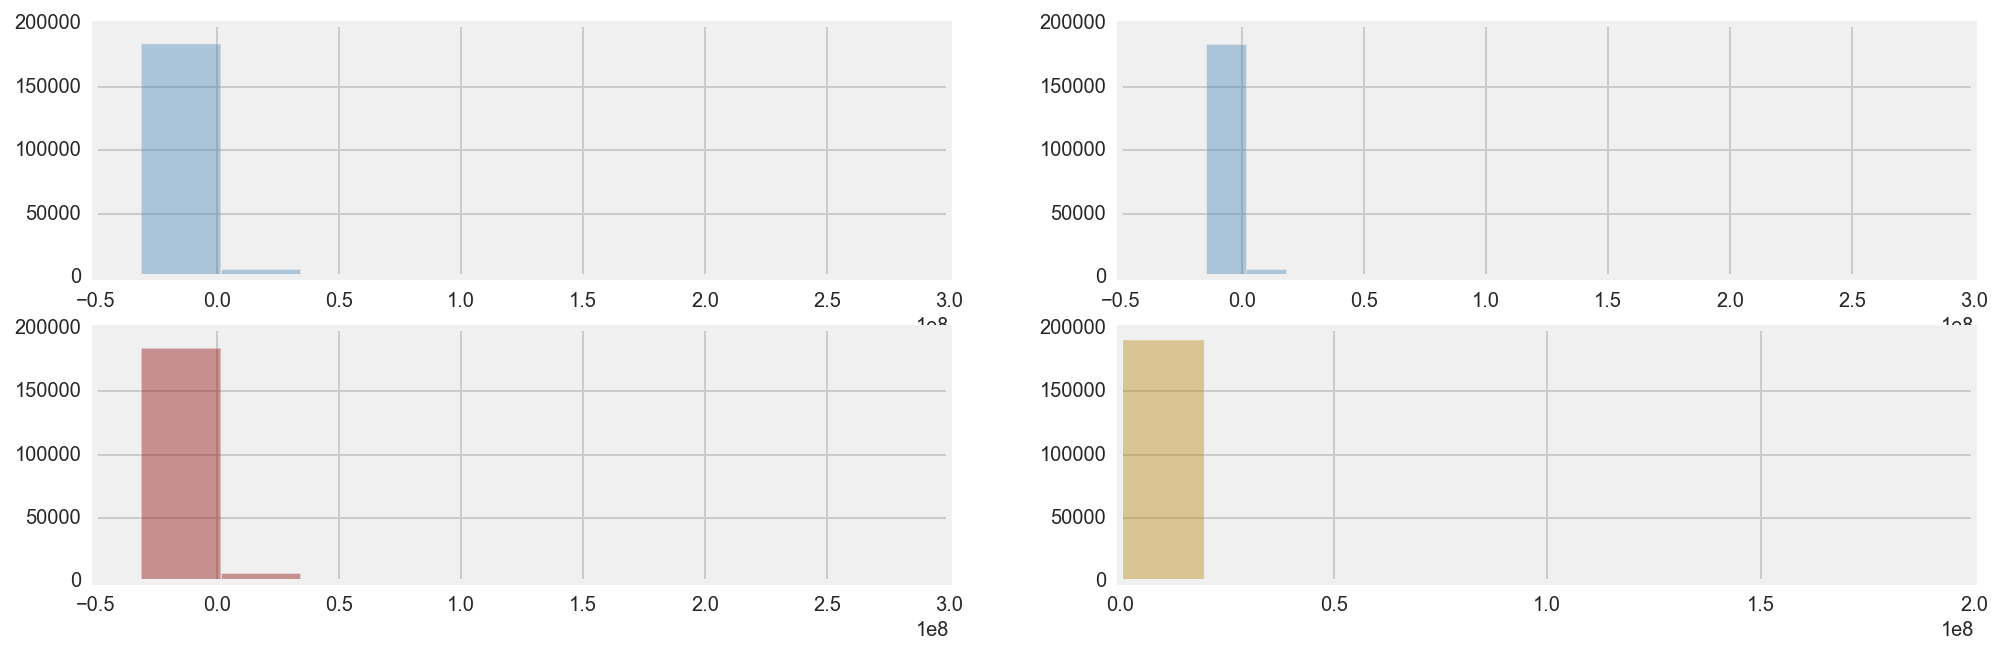

In [147]:
#plotting the residuals
fig, axarr = plt.subplots(2, 2, figsize=(15, 5))

sns.distplot(ridge_r, bins=10, hist=True, kde=False, 
             color='steelblue', ax=axarr[0,0], label='Ridge residuals')

sns.distplot(lin_r, bins=20, hist=True, kde=False, 
             color='steelblue', ax=axarr[0,1], label='Linear reg residuals')

sns.distplot(lasso_r, bins=10, hist=True, kde=False, 
             color='darkred', ax=axarr[1,0], label='Lasso residuals')

sns.distplot(enet_r, bins=10, hist=True, kde=False, 
             color='darkgoldenrod', ax=axarr[1,1], label='ElasticNet residuals')

plt.show()

In [ ]:
# in conclusiton my model was not a very good predictor. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another, different analysis and report on it

---

1. Combining multiple sources of data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.

This section is just another analysis like the first sections, but is more open-ended in what models you decide to build and why. Don't feel obligated to try every out every regularized regression model (though it doesn't hurt). 


In [176]:
pwd

u'/Users/caitlinmowdy/Desktop/DSI-SF-2-caitlinmowdy/projects/project-04'

In [177]:
# decided to use the parks info and scores data sets 
park_info = pd.read_csv('/Users/caitlinmowdy/Desktop/DSI-SF-2-caitlinmowdy/datasets/san_francisco/san_francisco/parks/park_info.csv')
park_scores = pd.read_csv('/Users/caitlinmowdy/Desktop/DSI-SF-2-caitlinmowdy/datasets/san_francisco/san_francisco/parks/park_scores.csv')

In [178]:
#merging the two dataframes together
parks = park_info.merge(park_scores, how='left', on='ParkID')
parks.head(3)

,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,Zipcode,Acreage,SupDist,ParkID,Location 1,Lat,PSA,Park,FQ,Score
0,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN,PSA1,10th Avenue-Clement Mini Park,FY05Q4,0.655
2,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN,PSA1,10th Avenue-Clement Mini Park,FY06Q2,0.854


In [179]:
#grouping by park name
park_average = parks.groupby('ParkName',as_index=False).mean()
park_ave = park_average
del park_ave['Lat']
#park_ave.head()

In [180]:
#drop nulls for acreage and score
park_ave = park_ave.dropna(subset=['Acreage', 'Score'])

In [153]:
#trying to look for outliers
# park_ave.boxplot('Acreage')
# park_ave.hist('Acreage')

In [181]:
#can tell there are outliers by the min max and mean
park_ave.Acreage.min(),park_ave.Acreage.max(),park_ave.Acreage.mean(),park_ave.Acreage.shape

(0.0, 1031.9799999999989, 16.40688524590165, (183,))

In [182]:
park_ave2 = park_ave[park_ave['Acreage'] < 50]

In [183]:
park_ave2.Acreage.min(),park_ave2.Acreage.max(),park_ave2.Acreage.mean(),park_ave2.Acreage.shape

(0.0, 36.079999999999998, 3.641249999999999, (176,))

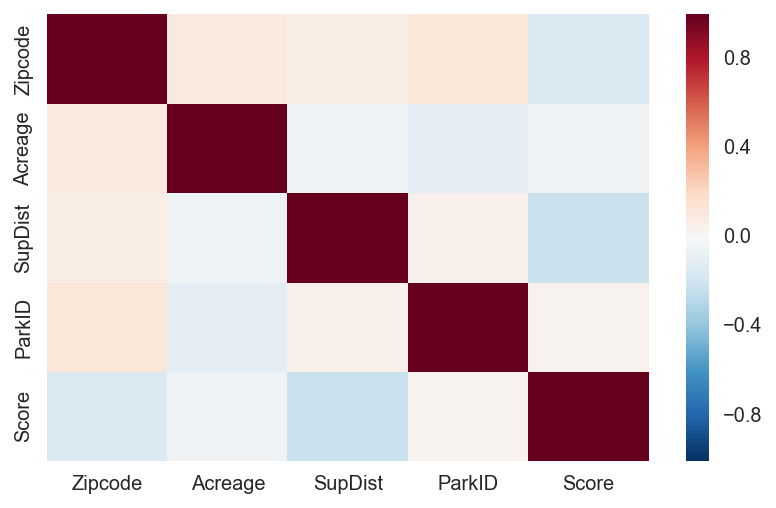

In [184]:
corrl = park_ave2.corr()
sns.heatmap(corrl)

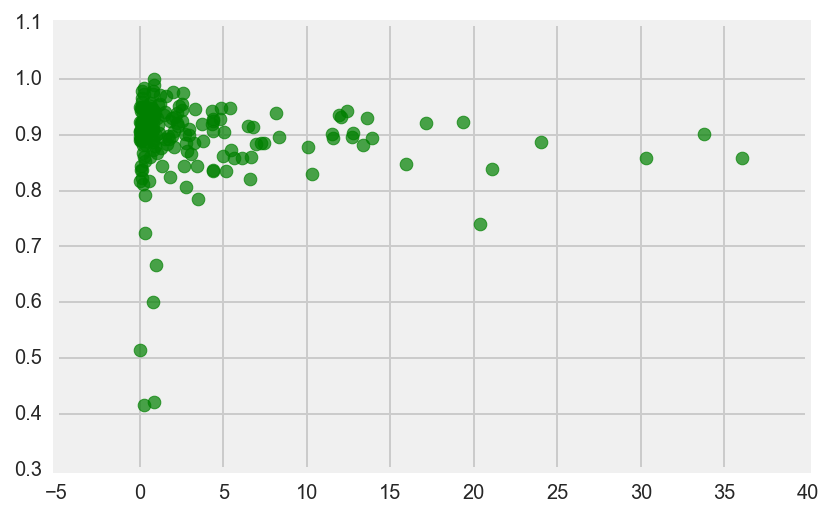

In [185]:
plt.scatter(park_ave2.Acreage,park_ave2.Score, s=40, alpha = .7, color = 'green')

In [159]:
# Hypothesis: Park score is impacted by and can be predicted with acreage

In [186]:
formula = 'Score ~ Acreage'
y, X = patsy.dmatrices(formula, data=park_ave2, return_type='dataframe')
y = np.array(y).ravel()
Xn = scaler.fit_transform(X)

linreg = LinearRegression()
linreg_scores = cross_val_score(linreg, Xn, y, cv=10)
allscores2 = {}
allscores2['linear Regression'] = [np.mean(linreg_scores)]
print linreg_scores
print np.mean(linreg_scores)

[-0.39314039 -0.0657674  -0.01087169  0.01179424 -0.15690179 -0.00090695
  0.02084623 -0.08653152 -0.06014714 -0.00455643]
-0.0746182836152


In [187]:
# ridge
from sklearn.linear_model import RidgeCV
alphas = np.logspace(0,5,20)
ridge_params = {
    'fit_intercept': [True, False], 
    'normalize':[False, True],
    'alpha': alphas
}

ridge = Ridge()
best_ridge = grid_search.GridSearchCV(ridge, ridge_params, cv=5)
r_results = best_ridge.fit(Xn, y)

ridge_scores = cross_val_score(best_ridge, Xn, y, cv=5)

allscores2['Ridge'] = [np.mean(ridge_scores)]
print "Ridge best Score: ", r_results.best_score_
print "Ridge Params: ", r_results.best_params_

print 'Ridge score: ', ridge_scores
print 'Ridge mean score: ',np.mean(ridge_scores)

Ridge best Score:  -0.038807974289
Ridge Params:  {'normalize': True, 'alpha': 1.8329807108324359, 'fit_intercept': True}
Ridge score:  [ 0.00337079 -0.00575831 -0.13523744 -0.04403952 -0.02165698]
Ridge mean score:  -0.0406642910652


In [188]:
#Lasso
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

alphas = np.logspace(0,5,20)
lasso_params = {
    'fit_intercept': [True, False], 
    'normalize':[False, True],
    'alpha': alphas
}

lasso = Lasso()
best_lasso = grid_search.GridSearchCV(lasso, ridge_params, cv=5)
l_results = best_lasso.fit(Xn, y)

lasso_scores = cross_val_score(best_lasso, Xn, y, cv=5)

allscores2['Lasso'] = [np.mean(lasso_scores)]
print "Lasso best Score: ", l_results.best_score_
print "Lasso Params: ", l_results.best_params_

print 'Lasso score: ', lasso_scores
print 'Lasso mean score: ',np.mean(lasso_scores)

Lasso best Score:  -0.0390066917781
Lasso Params:  {'normalize': False, 'alpha': 1.0, 'fit_intercept': True}
Lasso score:  [-0.00126008 -0.0033282  -0.1471379  -0.04403955 -0.00034621]
Lasso mean score:  -0.0392223867185


In [189]:
#elastic
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
alphas = np.logspace(0,5,20)
enet_params = {
    'fit_intercept': [True, False], 
    'normalize':[False, True],
    'alpha': alphas
}

enet = ElasticNet()
best_enet = grid_search.GridSearchCV(enet, enet_params, cv=5)
e_results = best_enet.fit(Xn, y)

enet_scores = cross_val_score(best_enet, Xn, y, cv=5)

allscores2['Elastic'] = [np.mean(enet_scores)]
print "Elastic best Score: ", e_results.best_score_
print "Elastic Params: ", e_results.best_params_

print 'Elastic score: ', enet_scores
print 'Elastic mean score: ',np.mean(enet_scores)

Elastic best Score:  -0.0390066917781
Elastic Params:  {'normalize': False, 'alpha': 1.0, 'fit_intercept': True}
Elastic score:  [-0.00126008 -0.0033282  -0.1471379  -0.04403955 -0.00034621]
Elastic mean score:  -0.0392223867185


In [190]:
ridge.fit(Xn, y)
enet.fit(Xn, y)
lasso.fit(Xn, y)
linreg.fit(Xn,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [192]:
allscores2
# Elastic ans Lasso are the best models  

{'Elastic': [-0.0392223867185304],
 'Lasso': [-0.0392223867185304],
 'Ridge': [-0.040664291065225774],
 'linear Regression': [-0.074618283615174336]}

In [193]:
ridge_r = ridge.predict(Xn).ravel()
lasso_r = lasso.predict(Xn).ravel()
enet_r = enet.predict(Xn).ravel()
lin_r = linreg.predict(Xn).ravel()

In [194]:
ridge_resid = y - ridge_r
lasso_resid = y - lasso_r
enet_resid = y - enet_r
lin_resid = y - lin_r

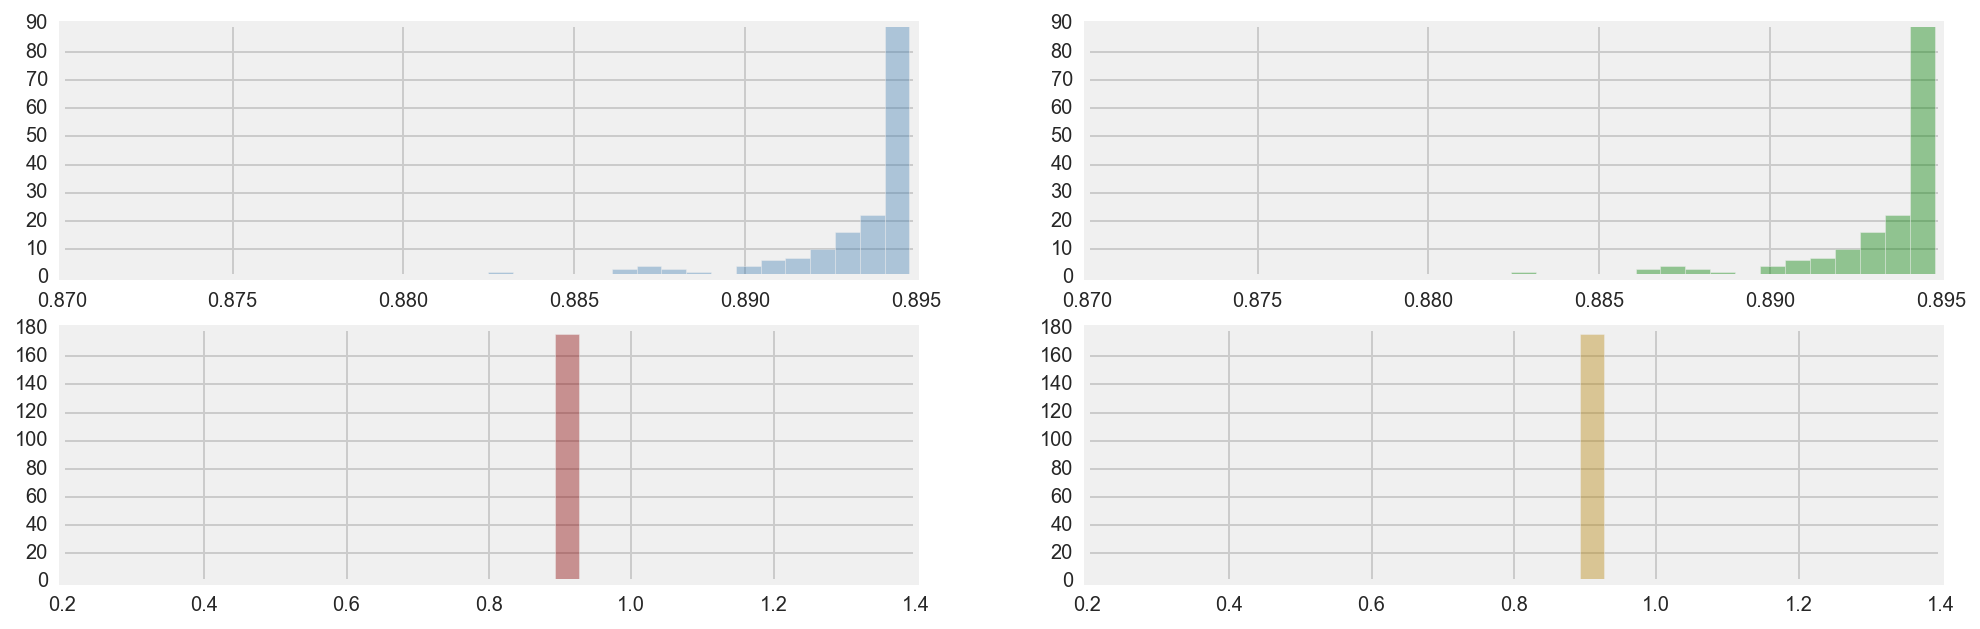

In [195]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 5))

sns.distplot(ridge_r, bins=30, hist=True, kde=False, 
             color='steelblue', ax=axarr[0,0], label='Ridge residuals')

sns.distplot(lin_r, bins=30, hist=True, kde=False, 
             color='green', ax=axarr[0,1], label='Ridge residuals')

sns.distplot(lasso_r, bins=30, hist=True, kde=False, 
             color='darkred', ax=axarr[1,0], label='Lasso residuals')

sns.distplot(enet_r, bins=30, hist=True, kde=False, 
             color='darkgoldenrod', ax=axarr[1,1], label='ElasticNet residuals')

plt.show()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.2 Ploting GridSearch with Lasso, Ridge, or Elasticnet
---
1. Using the gridsearch results, plot your score in relation to your parameters.
1. Plot the effect on your coefficients given alpha.
1. Plot any other parameter change to visualize the impact of any other hyperparameter.

It's helpful to understand the impact of parameters used in Gridsearch, and that you are comfortable working with the data that is generated for reporting to explore the results visually.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Select San Francisco data of your choice and construct a regularized regression model (this can be data from an earlier analysis if you like). Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.

For example, when I worked in neuroscience [we created an effective penalized regression dubbed "GraphNet"](http://arxiv.org/abs/1110.4139) that combined the Lasso and Ridge penalties like in Elastic net with a third penalty that rewarded clustering of coefficients according to physical distance in FMRI brain activation data.

**Devise of and implement a penalized regression for San Francisco data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?